# Week 03 "Pre-lecture" HW

### 1. Use fig.add_[h/v]line() and fig.add_[h/v]rect() to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset

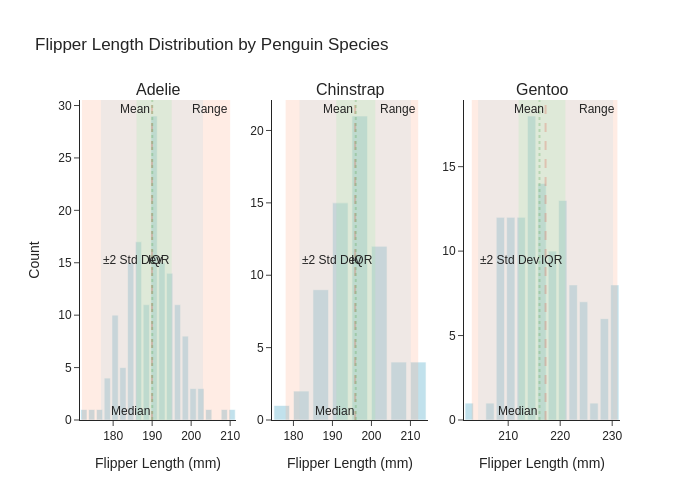

In [4]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(url)

# Drop rows with missing flipper_length_mm or species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# 2. Define the species
species_list = penguins['species'].unique()
num_species = len(species_list)

# 3. Create subplots: one for each species
fig = make_subplots(rows=1, cols=num_species, subplot_titles=species_list)

# 4. Iterate through each species to create histograms and add annotations
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    data_min = species_data.min()
    data_max = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    iqr = q3 - q1
    std = species_data.std()
    std_range_low = mean - 2 * std
    std_range_high = mean + 2 * std

    # Create histogram
    fig.add_trace(
        go.Histogram(
            x=species_data,
            name=species,
            marker_color='lightblue',
            opacity=0.75,
            showlegend=False
        ),
        row=1, col=i+1
    )
    
    # Add mean line
    fig.add_vline(
        x=mean,
        line=dict(color='red', width=2, dash='dash'),
        annotation_text='Mean',
        annotation_position='top left',
        row=1, col=i+1
    )
    
    # Add median line
    fig.add_vline(
        x=median,
        line=dict(color='green', width=2, dash='dot'),
        annotation_text='Median',
        annotation_position='bottom left',
        row=1, col=i+1
    )
    
    # Add range rectangle
    fig.add_vrect(
        x0=data_min,
        x1=data_max,
        fillcolor="LightSalmon",
        opacity=0.2,
        line_width=0,
        annotation_text="Range",
        annotation_position="top right",
        row=1, col=i+1
    )
    
    # Add IQR rectangle with corrected annotation_position
    fig.add_vrect(
        x0=q1,
        x1=q3,
        fillcolor="LightGreen",
        opacity=0.2,
        line_width=0,
        annotation_text="IQR",
        annotation_position="inside right",  # Corrected position
        row=1, col=i+1
    )
    
    # Add two standard deviations range rectangle with corrected annotation_position
    fig.add_vrect(
        x0=std_range_low,
        x1=std_range_high,
        fillcolor="LightBlue",
        opacity=0.2,
        line_width=0,
        annotation_text="±2 Std Dev",
        annotation_position="inside left",  # Corrected position
        row=1, col=i+1
    )

    # Update x-axis title
    fig.update_xaxes(title_text='Flipper Length (mm)', row=1, col=i+1)
    
    # Update y-axis title only for the first subplot
    if i == 0:
        fig.update_yaxes(title_text='Count', row=1, col=i+1)

# 5. Update layout for better spacing and title
fig.update_layout(
    title_text='Flipper Length Distribution by Penguin Species',
    bargap=0.2,
    template='simple_white'
)

# 6. Display the plot
fig.show(renderer="png")


### 2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

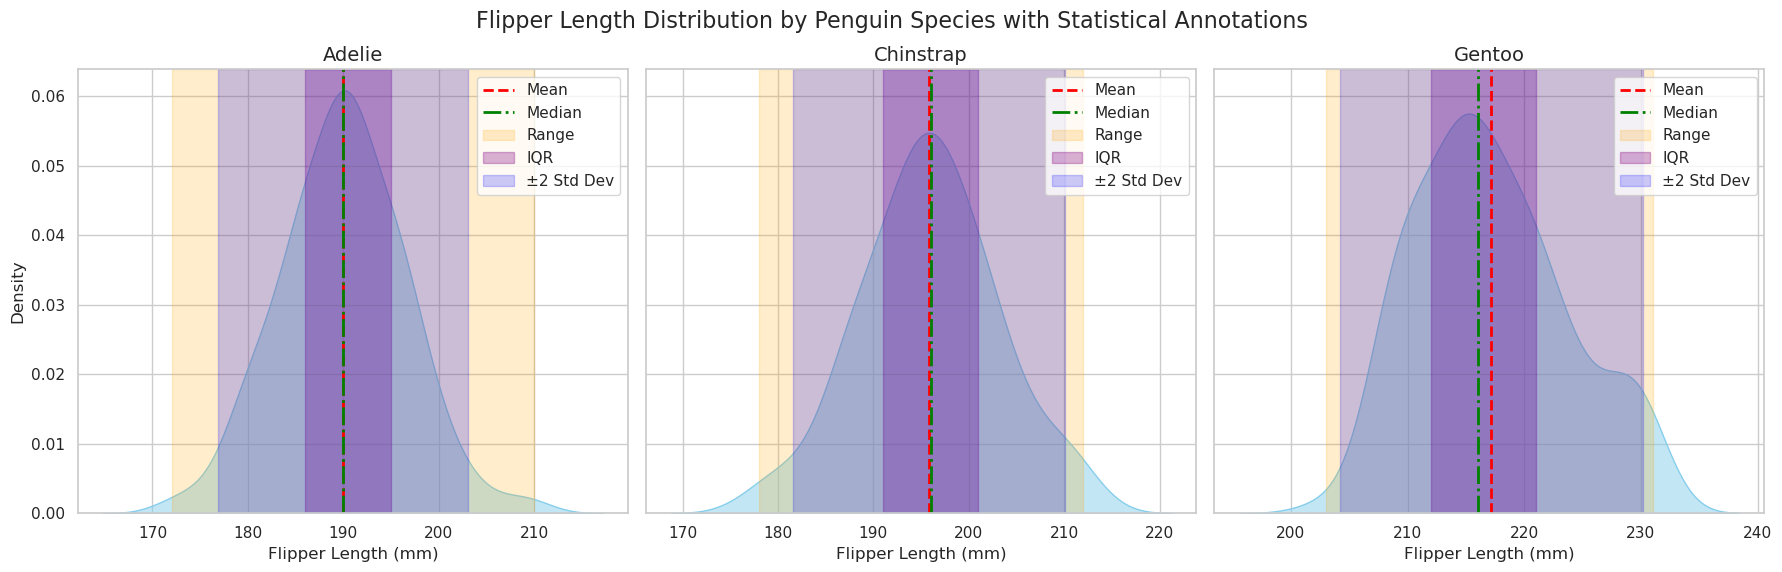

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(url)

# 2. Clean the data
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# 3. Calculate statistics
species_list = penguins['species'].unique()
stats = {}

for species in species_list:
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    mean = data.mean()
    median = data.median()
    data_min = data.min()
    data_max = data.max()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    std = data.std()
    std_range_low = mean - 2 * std
    std_range_high = mean + 2 * std
    
    stats[species] = {
        'mean': mean,
        'median': median,
        'min': data_min,
        'max': data_max,
        'q1': q1,
        'q3': q3,
        'iqr': iqr,
        'std': std,
        'std_low': std_range_low,
        'std_high': std_range_high
    }

# 4. Create subplots and plot KDEs
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define colors for annotations
mean_color = 'red'
median_color = 'green'
range_color = 'orange'
iqr_color = 'purple'
std_color = 'blue'

for ax, species in zip(axes, species_list):
    # Plot KDE
    sns.kdeplot(
        data=penguins[penguins['species'] == species],
        x='flipper_length_mm',
        fill=True,
        ax=ax,
        color='skyblue',
        alpha=0.5
    )
    
    # Retrieve statistics
    s = stats[species]
    
    # Plot mean and median lines
    ax.axvline(s['mean'], color=mean_color, linestyle='--', linewidth=2, label='Mean')
    ax.axvline(s['median'], color=median_color, linestyle='-.', linewidth=2, label='Median')
    
    # Highlight Range
    ax.axvspan(s['min'], s['max'], color=range_color, alpha=0.2, label='Range')
    
    # Highlight IQR
    ax.axvspan(s['q1'], s['q3'], color=iqr_color, alpha=0.3, label='IQR')
    
    # Highlight ±2 Std Dev
    ax.axvspan(s['std_low'], s['std_high'], color=std_color, alpha=0.2, label='±2 Std Dev')
    
    # Set titles and labels
    ax.set_title(f"{species}", fontsize=14)
    ax.set_xlabel('Flipper Length (mm)', fontsize=12)
    if ax == axes[0]:
        ax.set_ylabel('Density', fontsize=12)
    
    # Create custom legends
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    
    legend_elements = [
        Line2D([0], [0], color=mean_color, linestyle='--', linewidth=2, label='Mean'),
        Line2D([0], [0], color=median_color, linestyle='-.', linewidth=2, label='Median'),
        Patch(facecolor=range_color, edgecolor=range_color, alpha=0.2, label='Range'),
        Patch(facecolor=iqr_color, edgecolor=iqr_color, alpha=0.3, label='IQR'),
        Patch(facecolor=std_color, edgecolor=std_color, alpha=0.2, label='±2 Std Dev')
    ]
    
    ax.legend(handles=legend_elements, loc='upper right')

# 5. Customize and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Flipper Length Distribution by Penguin Species with Statistical Annotations', fontsize=16)
fig.show("png")


### 3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

I would probably prefer histograms because they’re pretty intuitive and easy to understand. They show the frequency of data points in a way that’s straightforward without requiring too much technical knowledge. I also like how they help me visualize the shape of the distribution, even though I know the bin size can affect the result. I would use box plots when I’m quickly comparing multiple distributions or looking for outliers. But I do feel like they simplify things too much sometimes, which is why histograms feel more useful. In terms of KDEs, I don’t really know the details about them, so I tend to stick with what I know for now.

### Summaries of my ChatBot session (Q#1-3) (01)
**Link to the this chat log history for "Pre-lecture" HW:** https://chatgpt.com/share/66f248da-e1cc-8011-acf8-ae986f1a46a1

**1. **Creating Annotated Histograms with Plotly:**
   - **User's Request:** The user sought assistance in visualizing the `flipper_length_mm` distribution from the penguins dataset using Plotly. Specifically, they wanted to create histograms for each penguin species and annotate them with statistical markers (mean, median, range, interquartile range, and ±2 standard deviations) using `fig.add_vline()` and `fig.add_vrect()`.
   - **Assistant's Response:** Provided comprehensive Python code utilizing Plotly to generate the desired histograms with annotations. The assistant outlined the steps, explained the code in detail, and included considerations for customization and Plotly version compatibility.

**2. **Addressing Plotly Code Errors:**
   - **User's Issue:** Encountered a `ValueError` related to invalid annotation positions (`"middle right"`) in the Plotly code.
   - **Assistant's Solution:** Corrected the annotation positions by replacing invalid values with valid options like `"inside right"` and `"inside left"`. Provided the revised code and offered troubleshooting tips to prevent similar errors, ensuring the user could successfully execute the visualization.

**3. **Handling Syntax Errors in Plotly Code:**
   - **User's Issue:** Reported a `SyntaxError` indicating an incomplete input (`lin`) in the Plotly script.
   - **Assistant's Solution:** Apologized for the inconvenience and re-provided the complete, corrected Plotly code. Included detailed troubleshooting steps to help the user identify and fix syntax-related issues, such as ensuring complete code copying, checking for typos, and verifying proper indentation.

**4. **Recreating Visualizations with Seaborn's KDE Plots:**
   - **User's Request:** Asked to redo the initial visualization task using Seaborn's Kernel Density Estimation (KDE) plots instead of Plotly histograms, organizing the figures in a row of three plots.
   - **Assistant's Response:** Delivered Python code using Seaborn and Matplotlib to create KDE plots for each penguin species. The assistant provided step-by-step instructions, including data loading, statistical calculations, plotting KDEs, adding annotations for statistical measures, and customizing the layout for clear visualization.

**5. **Reviewing User's Descriptions of Visualization Methods:**
   - **User's Input:** Shared personal descriptions of box plots, histograms, and KDEs, expressing uncertainty about KDEs.
   - **Assistant's Feedback:** Confirmed the accuracy of the user's descriptions, elaborated on each visualization method by detailing their components, strengths, limitations, and example use cases. Enhanced the user's understanding by providing additional insights and clarifications for each method.

**6. **Providing Pros and Cons Lists for Visualization Methods:**
   - **User's Request:** Despite previous in-depth explanations, the user requested concise "pros and cons" lists for box plots, histograms, and KDEs.
   - **Assistant's Response:** Compiled clear and organized pros and cons lists for each visualization method. Included a comparative summary table highlighting key features, strengths, limitations, best use cases, audience understanding, customization options, data requirements, and visualization complexity. This structured overview facilitated an easy comparison and understanding of when to use each method effectively.

---

**Overall Outcome:**
The user engaged in a comprehensive exploration of data distribution visualization methods, initially focusing on creating annotated histograms using Plotly, then transitioning to Seaborn's KDE plots. Along the way, they sought clarification and confirmation of their understanding of box plots, histograms, and KDEs. The assistant provided detailed code examples, troubleshooting assistance, and educational insights, culminating in structured pros and cons lists to aid in the user's learning and application of these visualization techniques.

### 4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions
**1. Which datasets have similar means and similar variances:**
- A and C

**2. Which datasets have similar means but quite different variances:**
- A and B

**3. Which datasets have similar variances but quite different means:**
- None

**4. Which datasets have quite different means and quite different variances:**
- A and D

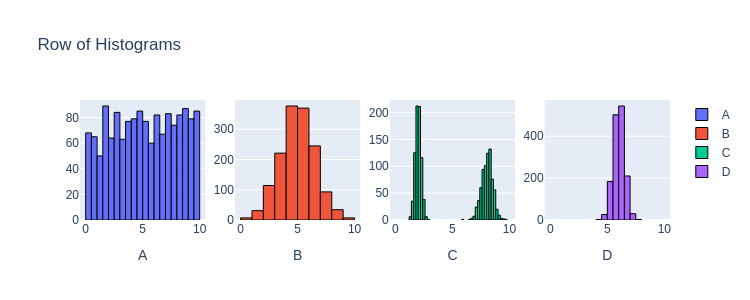

In [1]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Week 3 "Post-lecture" HW 

### 5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

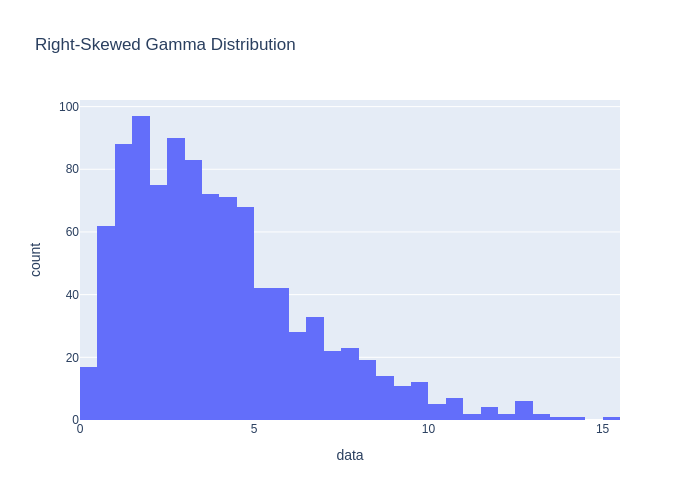

In [4]:
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Right-Skewed Gamma Distribution")
fig1.show(renderer="png")



*In this cell, we generate 1000 samples from a Gamma distribution, which is right-skewed by nature. We’ll then plot a histogram to visualize it. This Gamma distribution has a long right tail, meaning it's skewed to the right. We expect the mean to be greater than the median because the few extreme high values pull the mean upwards*

In [9]:
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])[0]

mean1, median1

(3.9698065797223716, 3.434294681915122)

*Now that we've generated and visualized the distribution, let's calculate the mean and median to see how they compare. As expected, for a right-skewed distribution, the mean will be greater than the median. This is because the mean gets pulled in the direction of the skew (right), while the median stays closer to the bulk of the data.*

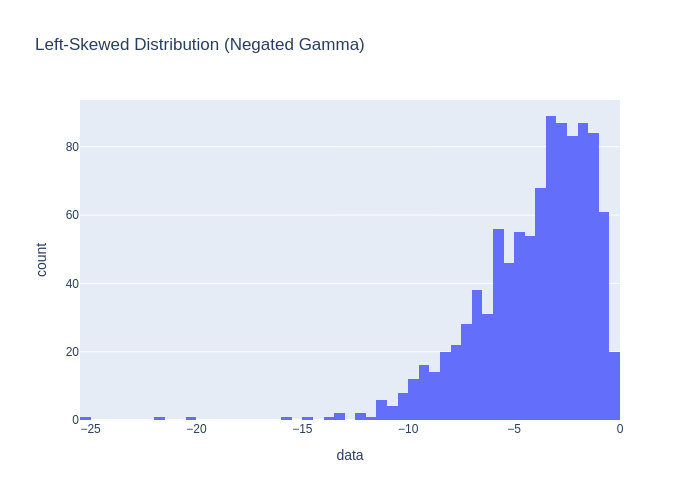

In [6]:
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Left-Skewed Distribution (Negated Gamma)")
fig2.show(renderer="png")


*To generate a left-skewed distribution, we can take the negative of a Gamma distribution (essentially flipping it horizontally). By negating the values of the right-skewed Gamma, we effectively create a left-skewed distribution. The tail is now on the left side, and we expect the mean to be less than the median.*

In [7]:
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])[0]

mean2, median2


(-4.078147405100214, -3.4172961790375735)

*Just like with the right-skewed distribution, let's now calculate the mean and median of the left-skewed sample and compare them. In this left-skewed distribution, the mean is less than the median. This happens because the mean gets pulled toward the lower extreme values (on the left), while the median remains closer to the bulk of the data.*

### Summaries of my ChatBot session (Q#5) (02)
**Link to the this chat log history for "Pre-lecture" HW:** https://chatgpt.com/share/66f4fd32-51ec-8011-afd3-3122015903df
Here’s a summary of our exchanges on exploring skewness and statistical distributions:

---

#### 1. **General Relationship Between Mean, Median, and Skewness**

You inquired about the relationship between the mean, median, and skewness, specifically focusing on "right" and "left" skewness.

I explained that:
- In **right-skewed** distributions, the mean is typically **greater** than the median (mean > median) due to extreme high values pulling the mean upwards.
- In **left-skewed** distributions, the mean is typically **less** than the median (mean < median) because extreme low values pull the mean down.
- In **symmetric distributions**, the mean and median are approximately equal.

The explanation highlighted the sensitivity of the mean to extreme values (outliers) and the robustness of the median.

---

#### 2. **Code Explanation for Skewness Exploration**

You shared a code snippet using SciPy, NumPy, and Pandas to generate and analyze skewed distributions, and asked for an explanation.

I broke down the code as follows:
- The code imports relevant libraries (SciPy for statistical distributions, Pandas for data manipulation, and NumPy for numerical calculations).
- A right-skewed sample (`sample1`) is generated from a gamma distribution, and its histogram is plotted. The code then calculates both the mean and median of `sample1`.
- A second sample (`sample2`) is created by negating the values of the gamma distribution, resulting in a left-skewed sample.
- I explained that the gamma distribution is naturally right-skewed, and negating its values flips the skewness to the left. The mean and median calculations provide insight into the relationship between these measures and skewness.

---

Let me know if you’d like any adjustments or additional details for your homework submission!

### 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

#### We will follow the the general sequence of steps from TUT03 to understand a dataset:
1. Prepare data url
2. Import data using pandas or numpy, import plotly.express for visualization
3. Use different methods for dataframe to see basic information about the data frame, using df.shape, df.describe(), df.info()
4. Handle missing data
5. Organize data (sort) using df.iloc(), find mode, median, q1, q3, min, max (statistics), using df.describe(),
6. Find distribution (making visualization such as bar chart, histogram, box plot)

---

#### Step 1: Prepare Data URL
I chose the Chess Game Dataset (Lichess) from TidyTuesday:

In [2]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-10-01/chess.csv'

---
#### Step 2: Import Libraries and Load the Data Set
First, we'll import the necessary libraries and load the dataset into a pandas DataFrame:

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_csv(data_url)

df.head()


,game_id,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000,1504130000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000,1504110000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000,1504030000000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


---
#### Step 3: Explore Basic Information about the DataFrame
Let's explore the basic structure and summary statistics of the dataset.

a. Shape of the DataFrame:

In [9]:
# Get the shape of the DataFrame
print("DataFrame shape:", df.shape)

DataFrame shape: (20058, 16)


b. Information About the DataFrame:

In [10]:
# Get info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   game_id         20058 non-null  object
 1   rated           20058 non-null  bool  
 2   start_time      20058 non-null  int64 
 3   end_time        20058 non-null  int64 
 4   turns           20058 non-null  int64 
 5   victory_status  20058 non-null  object
 6   winner          20058 non-null  object
 7   time_increment  20058 non-null  object
 8   white_id        20058 non-null  object
 9   white_rating    20058 non-null  int64 
 10  black_id        20058 non-null  object
 11  black_rating    20058 non-null  int64 
 12  moves           20058 non-null  object
 13  opening_eco     20058 non-null  object
 14  opening_name    20058 non-null  object
 15  opening_ply     20058 non-null  int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 2.3+ MB


c. Statistical Summary:

In [13]:
# Get statistical summary
df.describe()

,start_time,end_time,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


---
#### 4. Handle Missing Data
Let's check for missing values in the dataset:

In [12]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
game_id           0
rated             0
start_time        0
end_time          0
turns             0
victory_status    0
winner            0
time_increment    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


There is no missing value, so we are good.

---
#### Step 5: Organize Data and Compute Statistics
We'll compute key statistics like mode, median, quartiles, minimum, and maximum for relevant numerical columns.

a. Descriptive Statistics for Player Ratings:


In [14]:
# Descriptive statistics for white player ratings
print("White Player Ratings Statistics:")
print(df['white_rating'].describe())

# Descriptive statistics for black player ratings
print("\nBlack Player Ratings Statistics:")
print(df['black_rating'].describe())


White Player Ratings Statistics:
count    20058.000000
mean      1596.631868
std        291.253376
min        784.000000
25%       1398.000000
50%       1567.000000
75%       1793.000000
max       2700.000000
Name: white_rating, dtype: float64

Black Player Ratings Statistics:
count    20058.000000
mean      1588.831987
std        291.036126
min        789.000000
25%       1391.000000
50%       1562.000000
75%       1784.000000
max       2723.000000
Name: black_rating, dtype: float64


b. Calculate Median and Mode:

In [15]:
# Median ratings
median_white = df['white_rating'].median()
median_black = df['black_rating'].median()
print(f"\nMedian White Rating: {median_white}")
print(f"Median Black Rating: {median_black}")

# Mode ratings
mode_white = df['white_rating'].mode()[0]
mode_black = df['black_rating'].mode()[0]
print(f"Mode White Rating: {mode_white}")
print(f"Mode Black Rating: {mode_black}")


Median White Rating: 1567.0
Median Black Rating: 1562.0
Mode White Rating: 1500
Mode Black Rating: 1500


"Mode rating" for both white and black is 1500, probably due to Lichess setting a player's starting rating as 1500.

---
#### Step 6: Visualizations
We'll create various plots to visualize the distributions and relationships in the data.

a. Histogram of Player Ratings:

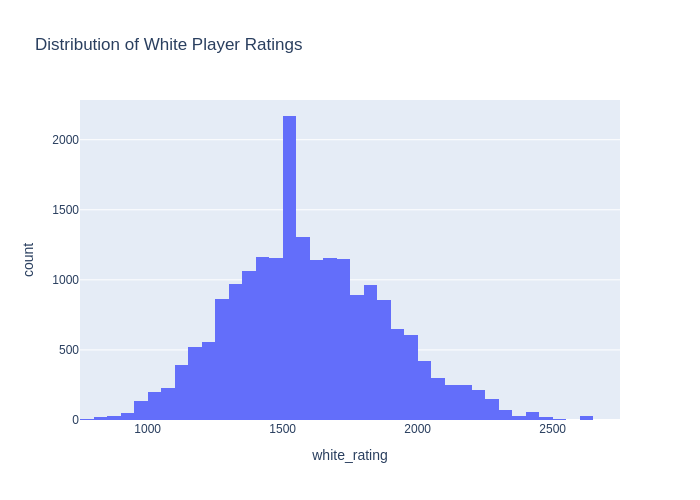

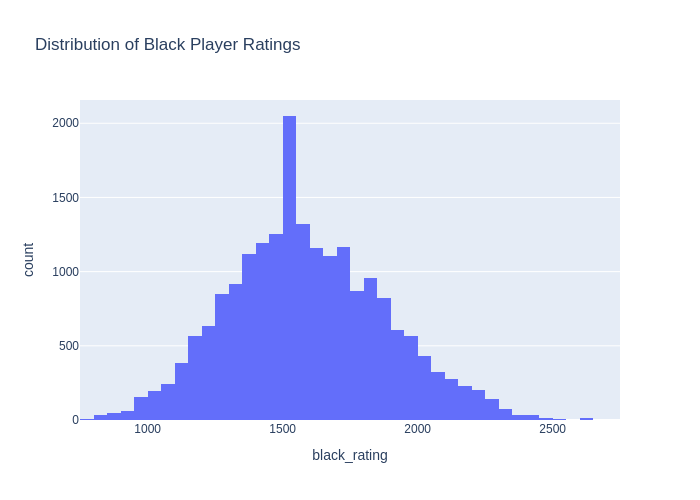

In [18]:
# Histogram for White Player Ratings
fig_white = px.histogram(df, x='white_rating', nbins=50, title='Distribution of White Player Ratings')
fig_white.show(renderer="png")

# Histogram for Black Player Ratings
fig_black = px.histogram(df, x='black_rating', nbins=50, title='Distribution of Black Player Ratings')
fig_black.show(renderer="png")

b. Box Plot Comparing White and Black Player Ratings:

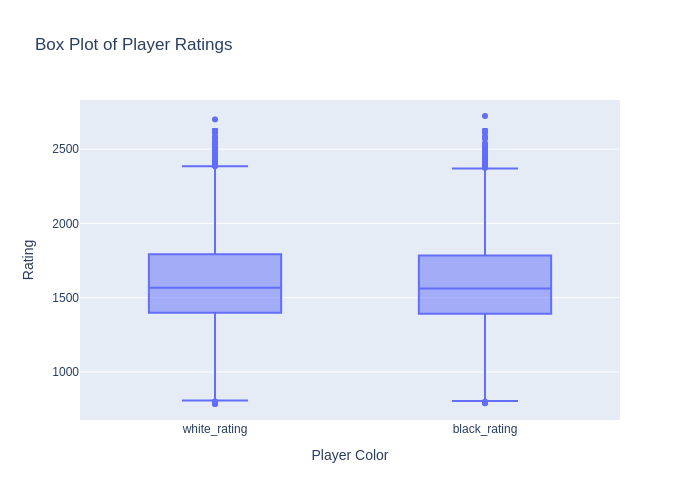

In [19]:
# Box plot for player ratings
fig_box = px.box(df, y=['white_rating', 'black_rating'], title='Box Plot of Player Ratings', labels={'value':'Rating', 'variable':'Player Color'})
fig_box.show(renderer="png")

c. Bar Chart of Game Outcomes:

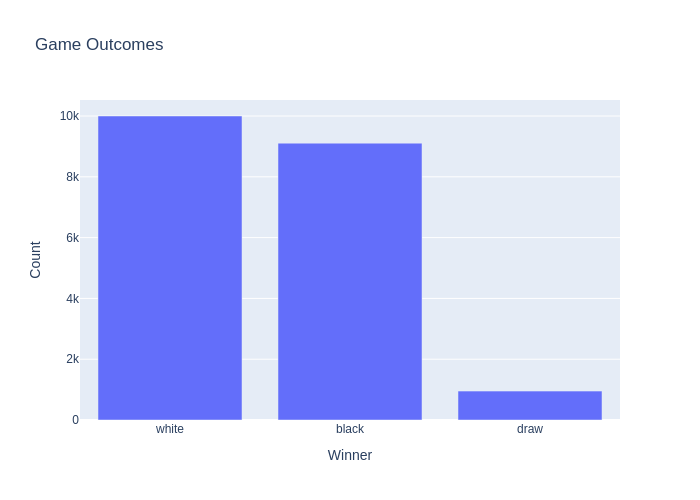

In [24]:
# Calculate the counts of each game outcome
winner_counts = df['winner'].value_counts().reset_index(name='count')

# Create the bar chart
fig_winner = px.bar(
    winner_counts,
    x='winner',
    y='count',
    title='Game Outcomes',
    labels={'winner': 'Winner', 'count': 'Count'}
)

fig_winner.show(renderer="png")

d. Most Common Chess Openings:

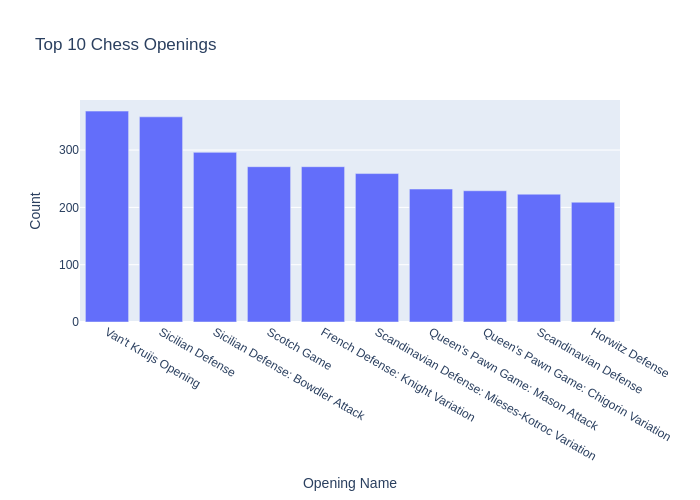

In [27]:
# Top 10 most common openings
top_openings = df['opening_name'].value_counts().nlargest(10).reset_index(name='count')

# Create the bar chart
fig_openings = px.bar(
    top_openings,
    x='opening_name',
    y='count',
    title='Top 10 Chess Openings',
    labels={'opening_name': 'Opening Name', 'count': 'Count'}
)

fig_openings.show(renderer="png")


### 7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation

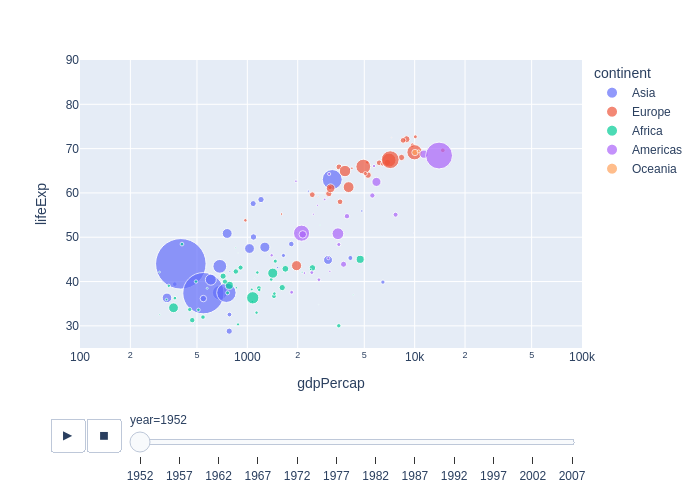

In [8]:
import plotly.express as px
df = px.data.gapminder()
fig_gapminder= px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig_gapminder.show(renderer="png")

### 8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

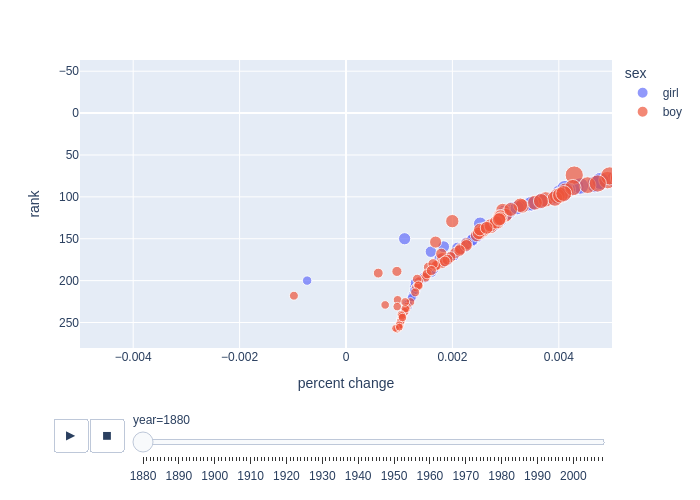

In [5]:
import pandas as pd
import plotly.express as px
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?
Yes